## 通し課題
### kaggle: kickstarter

データ : ks-projects-201801  
問題 : 目的変数をstateとする分類  
URL : https://www.kaggle.com/kemical/kickstarter-projects

--------------------------------------------------------

In [23]:
# Module Import; basic
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# model
from sklearn.linear_model import LogisticRegression

# preprocessing
from sklearn.preprocessing import OneHotEncoder

# train_test_split
from sklearn.model_selection import train_test_split

# model evaluation
from sklearn.metrics import accuracy_score

# other module
import pickle

In [2]:
# データ読み込み
df = pd.read_csv('./ks-projects-201801.csv')
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


In [3]:
# 2種類(failed, successful)のみを抽出する
failed = df[df['state'] == 'failed']
successful = df[df['state'] == 'successful']
data = pd.concat([failed, successful],ignore_index=True)
# 検算
print(data['state'].value_counts())
print(data['state'].value_counts().sum())

failed        197719
successful    133956
Name: state, dtype: int64
331675


In [4]:
# failed: successful:1
data.loc[data['state'] == 'failed', 'state'] = 0
data.loc[data['state'] == 'successful', 'state'] = 1
# float型に変換
data['state'] = data['state'].astype('float')
print(type(data['state'][0]))

<class 'numpy.float64'>


In [5]:
# one-hot-encoding ダミー変数化
enc = OneHotEncoder(sparse=False)
# 2次元配列に変換
# numpy配列として出力
arr = enc.fit_transform(data['main_category'].values.reshape(-1,1))
tmp = pd.DataFrame(arr, columns=enc.categories_[0])
data = pd.concat([data, tmp], axis=1)
# 確認
data.columns.values

array(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Art',
       'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography',
       'Publishing', 'Technology', 'Theater'], dtype=object)

In [6]:
# One-hot-Encorder
enc = OneHotEncoder(sparse=False)
# 2次元配列に変換
# numpy配列として出力
arr = enc.fit_transform(data['currency'].values.reshape(-1,1))
tmp = pd.DataFrame(arr, columns=enc.categories_[0])
data = pd.concat([data, tmp], axis=1)
# 確認
data.columns.values

array(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Art',
       'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography',
       'Publishing', 'Technology', 'Theater', 'AUD', 'CAD', 'CHF', 'DKK',
       'EUR', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD',
       'USD'], dtype=object)

In [7]:
# date型へ変換
deadline = pd.to_datetime(data['deadline'], format='%Y-%m-%d')
launched = pd.to_datetime(data['launched'], format='%Y-%m-%d').dt.floor('D') # 日付で切り捨て
# 期間算出
period = deadline - launched
# timedelta64 ⇒ int ⇒ float
period = period.dt.days.astype('float')
data['period'] = period
print(type(data['period'][0]))

<class 'numpy.float64'>


In [8]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Art', 'Comics',
       'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games',
       'Journalism', 'Music', 'Photography', 'Publishing', 'Technology',
       'Theater', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY',
       'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD', 'period'],
      dtype='object')

In [9]:
# 不要な列リスト作成
drop_columns = [
        'ID', 'name', 'category', 'main_category', 'currency', 'deadline',
#         'goal', 
        'launched', 'pledged', 
#         'state', 
        'backers', 'country',
        'usd pledged', 'usd_pledged_real', 'usd_goal_real', 
#         'Art', 'Comics','Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games',
#         'Journalism', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater', 
#         'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY',
#         'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD', 'period'
    ]

In [10]:
# 不要な列の削除
data2 = data.drop(columns=drop_columns)
data2

,goal,state,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,...,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD,period
0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
1,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60.0
2,45000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0
3,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0
4,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,1000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
331671,3500.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0
331672,950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,43.0
331673,5000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0


In [11]:
# 学習データ・テストデータの作成
train, test = train_test_split(data2.copy(), test_size=0.3)

In [12]:
# 学習データの標準化
def standard_scale(train, test):
    """
    学習データを使用して教師データを標準化する
    train : 学習データ
    test  : テストデータ
    戻り値: pandas.series
    """
    std = np.std(train.values) # 標準偏差
    mean = np.mean(train.values) # 平均
    return (test - mean)/std

In [13]:
# goalの標準化
train['goal_std'] = standard_scale(train['goal'],train['goal'])
test['goal_std'] = standard_scale(train['goal'], test['goal'])
# 確認
print('平均: {:.5f}'.format(np.mean(train['goal_std'].values)))
print('標準偏差: {:.5f}'.format(np.var(train['goal_std'].values)))
print()
# periodの標準化
train['period_std'] = standard_scale(train['period'],train['period'])
test['period_std'] = standard_scale(train['period'],test['period'])
# 確認
print('平均: {:.5f}'.format(np.mean(train['period_std'].values)))
print('標準偏差: {:.5f}'.format(np.var(train['period_std'].values)))

平均: 0.00000
標準偏差: 1.00000

平均: 0.00000
標準偏差: 1.00000


In [14]:
# 不要な列削除
train2 = train.drop(columns=['goal','period'])
test2 = test.drop(columns=['goal','period'])
print('■学習データ')
print(train2.columns)
print()
print('■テストデータ')
print(test2.columns)

■学習データ
Index(['state', 'Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
       'Film & Video', 'Food', 'Games', 'Journalism', 'Music', 'Photography',
       'Publishing', 'Technology', 'Theater', 'AUD', 'CAD', 'CHF', 'DKK',
       'EUR', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD',
       'goal_std', 'period_std'],
      dtype='object')

■テストデータ
Index(['state', 'Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
       'Film & Video', 'Food', 'Games', 'Journalism', 'Music', 'Photography',
       'Publishing', 'Technology', 'Theater', 'AUD', 'CAD', 'CHF', 'DKK',
       'EUR', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD',
       'goal_std', 'period_std'],
      dtype='object')


In [15]:
# 説明変数・目的変数に分割
train_y = train2['state']
train_X = train2.drop(['state'], axis=1)

test_y = test2['state']
test_X = test2.drop(['state'], axis=1)

-------------------------
#### ■ ステップワイズによる特徴選択
--------------------------

In [16]:
# # ステップワイズ法
# 
# from sklearn.feature_selection import RFECV

# # estimatorセット
# estimator = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=500)
# # インスタンス生成
# rfecv = RFECV(estimator, cv=3, scoring='accuracy')

# # 特徴選択の実行
# rfecv.fit(train_X, train_y)

In [17]:
# # モデルの保存
# file_name = 'logisticregression_rfecv.sav'
# pickle.dump(rfecv, open(file_name, 'wb'))

In [18]:
# モデルの読み込み
file_name = 'logisticregression_rfecv.sav'
model = pickle.load(open(file_name, 'rb'))

In [19]:
# 特徴ランキング(1が最も重要)
print('Feature ranking: \n{}'.format(model.ranking_))
print()
print('Not important feature:')
print(train_X.columns[~model.support_])

Feature ranking: 
[4 1 1 1 2 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1]

Not important feature:
Index(['Art', 'Design', 'Film & Video', 'SGD'], dtype='object')


In [32]:
# 重要度が低い特徴を削る
train_X2 = train_X.drop(columns=train_X.columns[~model.support_], axis=1)
test_X2 = test_X.drop(columns=train_X.columns[~model.support_], axis=1)

# 削除後の列名確認
print(train_X2.columns)
print(test_X2.columns)
print(train_X2.columns == test_X2.columns)

Index(['Comics', 'Crafts', 'Dance', 'Fashion', 'Food', 'Games', 'Journalism',
       'Music', 'Photography', 'Publishing', 'Technology', 'Theater', 'AUD',
       'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD',
       'SEK', 'USD', 'goal_std', 'period_std'],
      dtype='object')
Index(['Comics', 'Crafts', 'Dance', 'Fashion', 'Food', 'Games', 'Journalism',
       'Music', 'Photography', 'Publishing', 'Technology', 'Theater', 'AUD',
       'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD',
       'SEK', 'USD', 'goal_std', 'period_std'],
      dtype='object')
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [39]:
# 特徴を削らずそのままで予測
clf = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=500)
clf.fit(train_X, train_y)
y_pre = clf.predict(test_X)
print('No reduction')
print('分類精度：{:.4f}%'.format(accuracy_score(test_y, y_pre)*100))

print()
# 特徴を削ったデータで予測
clf = LogisticRegression(fit_intercept=True, solver='lbfgs', max_iter=500)
clf.fit(train_X2, train_y)
y_pre = clf.predict(test_X2)
print('Feature reduction')
print('分類精度: {:.4f}%'.format(accuracy_score(test_y, y_pre)*100))

No reduction
分類精度：64.2915%

Feature reduction
分類精度: 64.3016%


- 僅かだが、特徴選択により精度向上が見られた。

--------------
#### ■組み込み法による特徴選択(決定木)
--------------

In [60]:
# decision treeのインポート
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [65]:
# estimator
clf = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=5, 
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=9999
)

# 学習
clf.fit(train_X, train_y)
y_pre = clf.predict(test_X)
print('分類精度: {:.4f}%'.format(accuracy_score(test_y, y_pre)*100))

分類精度: 64.1237%


[0.         0.03550088 0.         0.         0.00588388 0.0125442
 0.         0.         0.00228259 0.         0.05352469 0.
 0.         0.01955978 0.06034832 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.57674518
 0.23361047]


Text(0.5, 0, 'importance')

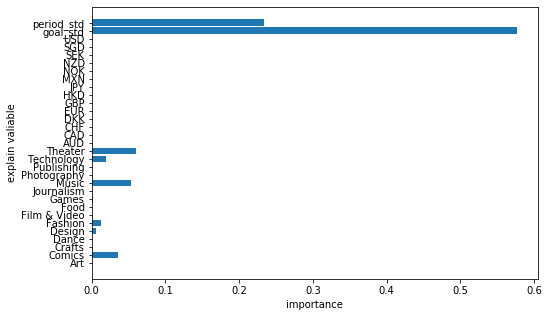

In [80]:
# 説明変数の重要度を出力
print(clf.feature_importances_)

# 描画
plt.figure(figsize=(8,5))
plt.barh(np.arange(0,len(clf.feature_importances_)), clf.feature_importances_,
        tick_label=train_X.columns.values)
plt.ylabel('explain valiables')
plt.xlabel('importance')

In [84]:
# 削除する変数をまとめてみる
drop_columns = train_X.columns[clf.feature_importances_ <= 0]
drop_columns

Index(['Art', 'Crafts', 'Dance', 'Film & Video', 'Food', 'Journalism',
       'Photography', 'Publishing', 'AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP',
       'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'SEK', 'SGD', 'USD'],
      dtype='object')

In [85]:
# 重要度の低い変数を削除したデータの作成
train_X3 = train_X.drop(columns=drop_columns, axis=1)
test_X3 = test_X.drop(columns=drop_columns, axis=1)

In [90]:
# 重要度の高い変数のみで予測
clf = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=400, random_state=9999)
clf.fit(train_X3, train_y)
y_pre = clf.predict(test_X3)
print('説明変数の数: {}'.format(len(train_X3.columns.values)))
print('分類精度: {:.4f}%'.format(accuracy_score(test_y,y_pre)*100))

説明変数の数: 9
分類精度: 63.0845%


--------------------
#### ■ 木モデルの利用
------------------

In [91]:
# 木モデルのモジュール
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [93]:
# インスタンス生成
clf = RandomForestClassifier(
    n_estimators=10, 
    max_depth=5, 
    min_samples_leaf=3,
    min_samples_split=3,
    criterion='entropy',
    random_state=9999
)

# 学習
clf.fit(train_X, train_y)
print('【学習データ】分類精度: {:.4f}%'.format(clf.score(train_X,train_y)*100))
print('【テストデータ】分類精度: {:.4f}%'.format(clf.score(test_X,test_y)*100))

【学習データ】分類精度: 63.4504%
【テストデータ】分類精度: 63.1509%


In [104]:
# Gridsearchでパラメータ調整
from sklearn.model_selection import GridSearchCV

In [119]:
# # パラメータセット
# params = {
#     'max_depth': [2,3,4,5],
#     'n_estimators': [10,30,50,100],
#     'min_samples_leaf': [1,3,10],
#     'min_samples_split': [2,3,10],
#     'criterion': ['entropy','gini']
# }

# # グリッドサーチのインスタンス生成
# gs = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=9999), 
#     param_grid=params, 
#     cv=2,
#     n_jobs=4
# )
# # グリッドサーチ
# gs.fit(train_X, train_y)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=9999, verbose=0,
                                              warm_start=False),
             iid

In [120]:
# # pickleで保存
# file_name = 'gridsearch_randomforest.sav'
# pickle.dump(gs, open(file_name, 'wb'))

In [131]:
# pickle読み込み
file_name = 'gridsearch_randomforest.sav'
model = pickle.load(open(file_name,'rb'))

print('ベストスコア(学習データ): {:.4f}%'.format(model.best_score_*100))
print('ベストパラメータ: \n{}'.format(model.best_params_))

# スコア一覧
gs_result = pd.DataFrame.from_dict(model.cv_results_)
gs_result.to_csv('GridSearch_randomforest_score_summary.csv')

ベストスコア(学習データ): 63.9565%
ベストパラメータ: 
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 10}


In [134]:
# ベストパラメータで予測
best_model = model.best_estimator_
y_pre = best_model.predict(test_X)
print('予測精度: {:.4f}%'.format(accuracy_score(test_y, y_pre)*100))

予測精度: 64.0654%


--------------
#### ■ Adaboost
--------------

In [136]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [145]:
# インスタンス生成
clf = AdaBoostClassifier(
                DecisionTreeClassifier(
                    max_depth=5,
                    min_samples_leaf=3,
                    min_samples_split=2,
                    criterion='gini'),
        n_estimators=20,
        random_state=9999
)

# 学習
clf.fit(train_X, train_y)

# pickleでモデル保存
file_name = 'Adaboost_DecisionTree.sav'
pickle.dump(clf, open(file_name,'wb'))

In [148]:
# pickle読み込み
file_name = 'Adaboost_DecisionTree.sav'
model = pickle.load(open(file_name,'rb'))
# 分類精度(学習データ)
print('score for training data: {:.4f}%'.format(model.score(train_X,train_y)*100))

score for training data: 66.6170%


[0.         0.00177005 0.00186516 0.00204971 0.00453518 0.00537936
 0.00639016 0.00717989 0.00827776 0.00832144 0.00862881 0.00874727
 0.01022332 0.01183503 0.01205902 0.01218536 0.01452604 0.01466846
 0.01519553 0.01555518 0.01748468 0.02059787 0.02171295 0.02356699
 0.02369049 0.02558824 0.02943786 0.0321135  0.03225678 0.25274684
 0.35141107]


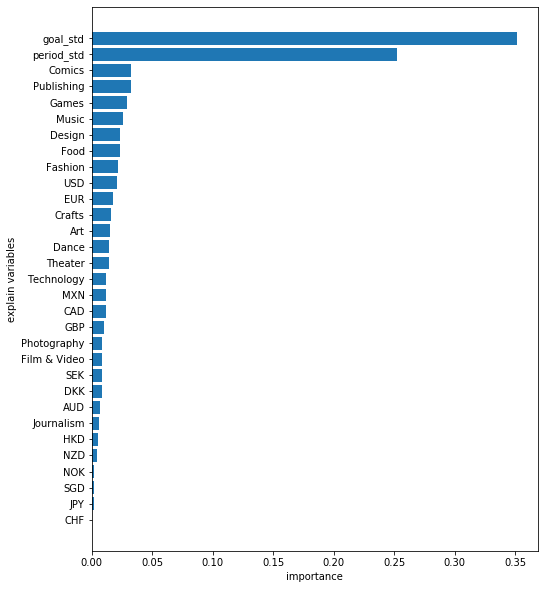

In [156]:
# 説明変数の重要度
sort_ind = np.argsort(clf.feature_importances_) # 並べ変えのインデックス(降順)
sort_columns = train_X.columns[sort_ind]

sort_importance = np.sort(clf.feature_importances_)
print(sort_importance)

# 描画
plt.figure(figsize=(8,10))
plt.barh(np.arange(0,len(train_X.columns)), sort_importance,tick_label=sort_columns)
plt.ylabel('explain variables')
plt.xlabel('importance')
plt.show()

In [158]:
# テストデータの予測精度
y_pre = model.predict(test_X)
print('分類精度: {:.4f}%'.format(accuracy_score(test_y,y_pre)*100))

分類精度: 66.3658%


------------------
#### ■ Neural Network
-------------------

In [183]:
# Neural Network - keras
from tensorflow.compat.v1.keras import Sequential
from tensorflow.compat.v1.keras.layers import Dense, Dropout, Activation
from tensorflow.compat.v1.keras.optimizers import SGD, RMSprop, Adam

In [192]:
train_y

190592    0.0
235081    1.0
248248    1.0
64569     0.0
156311    0.0
         ... 
252031    1.0
86314     0.0
93493     0.0
244298    1.0
254029    1.0
Name: state, Length: 232172, dtype: float64

In [195]:
# モデルを構成する
model = Sequential()

# 入力層(0層) - 中間層(1層)を定義
model.add(Dense(512, activation='relu', input_shape=(len(train_X.columns),)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 損失関数と最適化手法を指定
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
             metrics=['accuracy']
)
# 学習
model.fit(train_X, train_y,batch_size=100,epochs=100,verbose=1)

Epoch 1/100
232172/232172 [==============================] - 8s 36us/sample - loss: 0.6317 - acc: 0.6391
Epoch 2/100
232172/232172 [==============================] - 8s 36us/sample - loss: 0.6227 - acc: 0.6468
Epoch 3/100
232172/232172 [==============================] - 8s 35us/sample - loss: 0.6197 - acc: 0.6502
Epoch 4/100
232172/232172 [==============================] - 8s 35us/sample - loss: 0.6170 - acc: 0.6522
Epoch 5/100
232172/232172 [==============================] - 8s 35us/sample - loss: 0.6163 - acc: 0.6531
Epoch 6/100
232172/232172 [==============================] - 8s 36us/sample - loss: 0.6152 - acc: 0.6539
Epoch 7/100
232172/232172 [==============================] - 8s 35us/sample - loss: 0.6142 - acc: 0.6544
Epoch 8/100
232172/232172 [==============================] - 8s 36us/sample - loss: 0.6136 - acc: 0.6557
Epoch 9/100
232172/232172 [==============================] - 8s 36us/sample - loss: 0.6127 - acc: 0.6561
Epoch 10/100
232172/232172 [===========================

232172/232172 [==============================] - 8s 35us/sample - loss: 0.6052 - acc: 0.6626
Epoch 79/100
232172/232172 [==============================] - 9s 37us/sample - loss: 0.6048 - acc: 0.6626
Epoch 80/100
232172/232172 [==============================] - 8s 37us/sample - loss: 0.6049 - acc: 0.6627
Epoch 81/100
232172/232172 [==============================] - 9s 37us/sample - loss: 0.6049 - acc: 0.6623
Epoch 82/100
232172/232172 [==============================] - 8s 33us/sample - loss: 0.6045 - acc: 0.6627
Epoch 83/100
232172/232172 [==============================] - 8s 34us/sample - loss: 0.6048 - acc: 0.6621
Epoch 84/100
232172/232172 [==============================] - 8s 36us/sample - loss: 0.6050 - acc: 0.6623
Epoch 85/100
232172/232172 [==============================] - 8s 35us/sample - loss: 0.6048 - acc: 0.6628
Epoch 86/100
232172/232172 [==============================] - 8s 34us/sample - loss: 0.6049 - acc: 0.6623
Epoch 87/100
232172/232172 [==============================]

In [200]:
# モデル＆重みパラメータの保存
model.save('kickstarter_NN_model.h5')
model.save_weights('kickstarter_nn_weight_v1.h5')

In [ ]:
# モデルの読み込み
from keras.models import load_model
model = load_model('kickstarter_NN_model.h5')
model.summary()
# 重みの読み込み
model.load_weights('kickstarter_nn_weight_v1.h5')

In [207]:
# テストデータの予測
y_pre = model.predict(test_X)
y_pre[y_pre < 0.5] = 0.0
y_pre[y_pre >= 0.5] = 1.0
print('分類精度: {:.4f}%'.format(accuracy_score(test_y, y_pre)*100))

分類精度: 66.0563%


---------------
#### ■ DAY2と比較
-----------------

In [208]:
# DAY2のモデル - LogisticRegression
# LogisticRegression(l2)のグリッドサーチによる交差検証
day2 = LogisticRegression(penalty='l2', solver='lbfgs',random_state=9999, max_iter=300)

# 探索パラメータセット
params = {'C': [1, 5, 10, 50]}

# グリッドサーチ
gs_day2 = GridSearchCV(estimator=day2, param_grid=params, cv=3)
gs_day2.fit(train_X, train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=300, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=9999, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 5, 10, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [209]:
# pickleで保存
file_name = 'DAY2_LogisticRegression_L2.sav'
pickle.dump(gs_day2, open(file_name, 'wb'))

In [213]:
# pickle読み込み
day2_best = pickle.load(open('DAY2_LogisticRegression_L2.sav','rb')).best_estimator_
y_pre = day2_best.predict(test_X)
print('分類精度(DAY2): {:.4f}%'.format(accuracy_score(test_y, y_pre)*100))

分類精度(DAY2): 64.2855%


■DAY3のモデル
- Adaboost: 66.3658%
- NeuralNet: 66.0563%

■DAY2のモデル
- LogisticRegression(L2): 64.2855%